In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem

In [51]:
from sklearn.datasets import make_regression
from sklearn.datasets import make_blobs
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [52]:
Housing_data=pd.read_csv('HOUSING_DATA.csv')
Housing_data


,Indicator,RegionID,Date,Year,Home_value,Mongo_ID,City_Name,City_Size
0,ZATT,42415,1/31/2021,2021,334409,60403049bff9453704dc7595,"Waterloo, IA",Medium
1,ZATT,42415,12/31/2020,2020,332905,60403049bff9453704dc7596,"Waterloo, IA",Medium
2,ZATT,42415,11/30/2020,2020,331546,60403049bff9453704dc7597,"Waterloo, IA",Medium
3,ZATT,42415,10/31/2020,2020,334579,60403049bff9453704dc7598,"Waterloo, IA",Medium
4,ZATT,42415,9/30/2020,2020,336513,60403049bff9453704dc7599,"Waterloo, IA",Medium
...,...,...,...,...,...,...,...,...
2860,ZATT,394692,5/31/1996,1996,203496,60403609bff9453704dd3fdc,"Houston, TX",Big
2861,ZATT,394692,4/30/1996,1996,203364,60403609bff9453704dd3fdd,"Houston, TX",Big
2862,ZATT,394692,3/31/1996,1996,203177,60403609bff9453704dd3fde,"Houston, TX",Big
2863,ZATT,394692,2/29/1996,1996,203184,60403609bff9453704dd3fdf,"Houston, TX",Big


Shape:  (2865, 1) (2865, 1)
Housing R2 Score: 0.12598729182437673


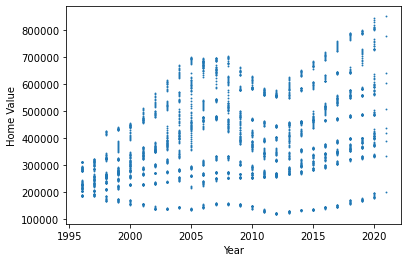

In [122]:
###  ALL ten cities=  Statistics

X = Housing_data['Year'].values.reshape(-1,1)
y= Housing_data['Home_value'].values.reshape(-1,1)
print("Shape: ", X.shape, y.shape)
plt.scatter(X,y, s=0.75)
plt.xlabel("Year")
plt.ylabel("Home Value")
Housingmodel=LinearRegression()
Housingmodel.fit(X,y)
Housingscore=Housingmodel.score(X,y)
print(f"Housing R2 Score: {Housingscore}")

plt.savefig('AllCitiesStats.png')

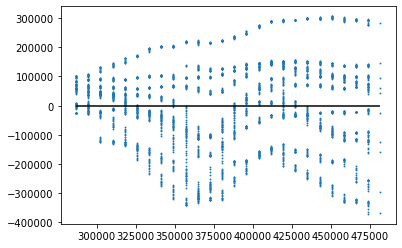

<Figure size 432x288 with 0 Axes>

In [123]:
###  ALLcities predictions

predictions = Housingmodel.predict(X)

#plot residuals
plt.scatter(predictions, predictions -y, s=0.75)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

plt.savefig('AllCitiesPredicts.png')

In [124]:
###   Using several cities (as a substitute for nationwide statistics) is not helpful.  SO, look at individual cities. 


In [125]:
### CREATE separate dataframes per city

Houston = Housing_data.loc[Housing_data['City_Name']=='Houston, TX']

Boston = Housing_data.loc[Housing_data['City_Name']=='Boston, MA']

Waterloo = Housing_data.loc[Housing_data['City_Name']=='Waterloo, IA']

SantaFe = Housing_data.loc[Housing_data['City_Name']=='Santa Fe, NM']

StAugustine = Housing_data.loc[Housing_data['City_Name']=='St. Augustine, FL']

Williamsburg = Housing_data.loc[Housing_data['City_Name']=='Williamsburg, VA']

Portland = Housing_data.loc[Housing_data['City_Name']=='Portland, WA']

Cookeville = Housing_data.loc[Housing_data['City_Name']=='Cookeville, TN']

Charlotte = Housing_data.loc[Housing_data['City_Name']=='Charlotte, NC']

Chicago = Housing_data.loc[Housing_data['City_Name']=='Chicago, IL']


Shape:  (301, 1) (301, 1)
Houston R2 Score: 0.9024825813106777


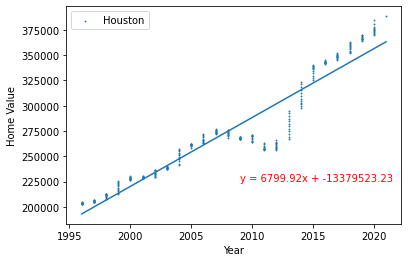

In [126]:
###  HOUSTON

X = Houston['Year'].values.reshape(-1,1)
y= Houston['Home_value'].values.reshape(-1,1)
print("Shape: ", X.shape, y.shape)

plt.scatter(X,y, s=0.75, label='Houston')
plt.legend(loc="best")
plt.xlabel("Year")
plt.ylabel("Home Value")

Houstonmodel=LinearRegression()
Houstonmodel.fit(X,y)
Houstonscore=Houstonmodel.score(X,y)
print(f"Houston R2 Score: {Houstonscore}")

#add the linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(Houston['Year'],Houston['Home_value'])
regress_values = Houston['Year'] * slope + intercept
plt.plot(Houston['Year'],regress_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq
plt.annotate(line_eq,(2009,225000),fontsize=10,color="red")

plt.savefig('HoustonStats.png')

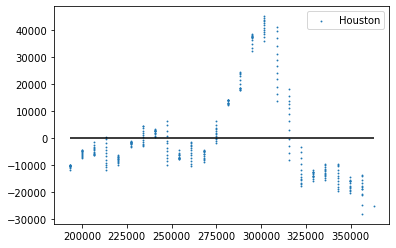

<Figure size 432x288 with 0 Axes>

In [71]:
###  HOUSTON predictions

predictions = Houstonmodel.predict(X)

#plot residuals
plt.scatter(predictions, predictions -y, label='Houston', s=0.75)
plt.legend(loc="best")
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()
plt.savefig('HoustonPredicts.png')

Shape:  (273, 1) (273, 1)
Santa Fe R2 Score: 0.5583904458073568


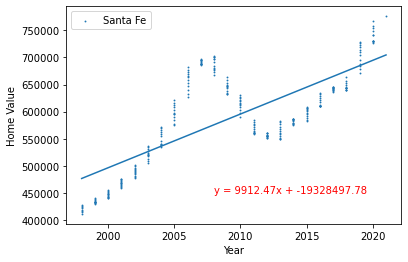

In [127]:
###  SANTE FE

X = SantaFe['Year'].values.reshape(-1,1)
y= SantaFe['Home_value'].values.reshape(-1,1)
print("Shape: ", X.shape, y.shape)
plt.scatter(X,y, s=0.75, label='Santa Fe')
plt.legend(loc="best")
plt.xlabel("Year")
plt.ylabel("Home Value")
SantaFemodel=LinearRegression()
SantaFemodel.fit(X,y)
SantaFescore=SantaFemodel.score(X,y)
print(f"Santa Fe R2 Score: {SantaFescore}")

#add the linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(SantaFe['Year'],SantaFe['Home_value'])
regress_values = SantaFe['Year'] * slope + intercept
plt.plot(SantaFe['Year'],regress_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq
plt.annotate(line_eq,(2008,450000),fontsize=10,color="red")

plt.savefig('SantaFeStats.png')

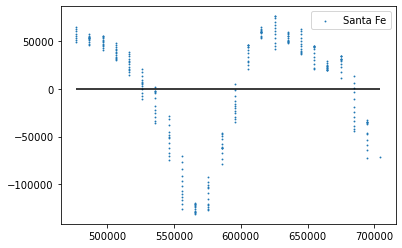

<Figure size 432x288 with 0 Axes>

In [57]:
###  SANTE FE predictions

predictions = SantaFemodel.predict(X)

#plot residuals
plt.scatter(predictions, predictions -y, label="Santa Fe", s=0.75)
plt.legend(loc="best")
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

plt.savefig('SantaFePredict.png')

Shape:  (301, 1) (301, 1)
Chicago R2 Score: 0.19056912223812195


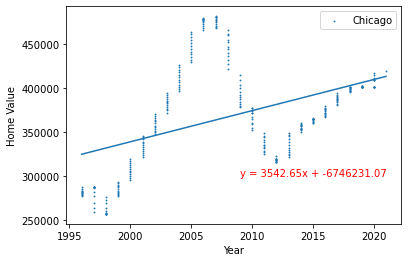

In [128]:
###  Chicago

X = Chicago['Year'].values.reshape(-1,1)
y= Chicago['Home_value'].values.reshape(-1,1)
print("Shape: ", X.shape, y.shape)
plt.scatter(X,y, s=0.75, label = "Chicago")
plt.legend(loc="best")
plt.xlabel("Year")
plt.ylabel("Home Value")
Chicagomodel=LinearRegression()
Chicagomodel.fit(X,y)
Chicagoscore=Chicagomodel.score(X,y)
print(f"Chicago R2 Score: {Chicagoscore}")

#add the linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(Chicago['Year'],Chicago['Home_value'])
regress_values = Chicago['Year'] * slope + intercept
plt.plot(Chicago['Year'],regress_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq
plt.annotate(line_eq,(2009,300000),fontsize=10,color="red")

plt.savefig('ChicagoStats.png')

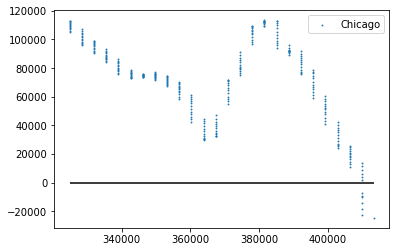

In [66]:
###  Chicago predictions

predictions = Chicagomodel.predict(X)

#plot residuals
plt.scatter(predictions, predictions -y, label="Chicago", s=0.75)
plt.legend(loc="best")
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()
plt.savefig('ChicagoPredicts.png')

Shape:  (301, 1) (301, 1)
Charlotte R2 Score: -33.37615432904959


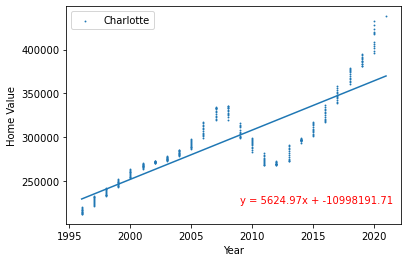

In [129]:
###  Charlotte

X = Charlotte['Year'].values.reshape(-1,1)
y= Charlotte['Home_value'].values.reshape(-1,1)
print("Shape: ", X.shape, y.shape)
plt.scatter(X,y, s=0.75, label="Charlotte")
plt.legend(loc="best")
plt.xlabel("Year")
plt.ylabel("Home Value")
Charlottemodel=LinearRegression()
Charlottemodel.fit(X,y)
Charlottescore=SantaFemodel.score(X,y)
print(f"Charlotte R2 Score: {Charlottescore}")

#add the linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(Charlotte['Year'],Charlotte['Home_value'])
regress_values = Charlotte['Year'] * slope + intercept
plt.plot(Charlotte['Year'],regress_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq
plt.annotate(line_eq,(2009,225000),fontsize=10,color="red")

plt.savefig('CharlotteStats.png')

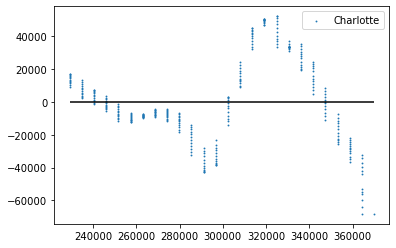

In [75]:
###  Charlotte predictions

predictions = Charlottemodel.predict(X)

#plot residuals
plt.scatter(predictions, predictions -y, label="Charlotte", s=0.75)
plt.legend(loc="best")
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()
plt.savefig('Charlotte.png')

Shape:  (301, 1) (301, 1)
Boston R2 Score: 0.7534606466744083


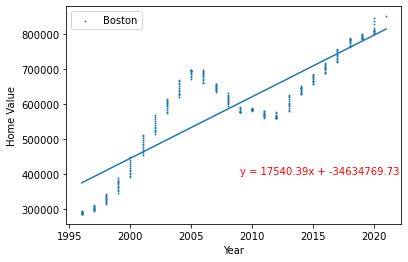

In [130]:
###  Boston

X = Boston['Year'].values.reshape(-1,1)
y= Boston['Home_value'].values.reshape(-1,1)
print("Shape: ", X.shape, y.shape)
plt.scatter(X,y, s=0.75, label="Boston")
plt.legend(loc="best")
plt.xlabel("Year")
plt.ylabel("Home Value")
Bostonmodel=LinearRegression()
Bostonmodel.fit(X,y)
Bostonscore=Bostonmodel.score(X,y)
print(f"Boston R2 Score: {Bostonscore}")

#add the linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(Boston['Year'],Boston['Home_value'])
regress_values = Boston['Year'] * slope + intercept
plt.plot(Boston['Year'],regress_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq
plt.annotate(line_eq,(2009,400000),fontsize=10,color="red")

plt.savefig('BostonStats.png')

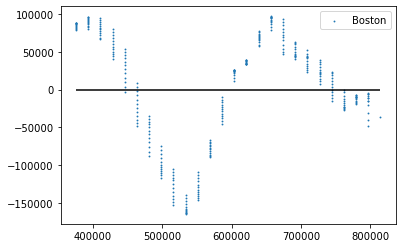

In [79]:
###  Boston predictions

predictions = Bostonmodel.predict(X)

#plot residuals
plt.scatter(predictions, predictions -y, label="Boston", s=0.75)
plt.legend(loc="best")
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()
plt.savefig('BostonPredicts.png')

Shape:  (301, 1) (301, 1)
Cookeville R2 Score: 0.07829095270829312


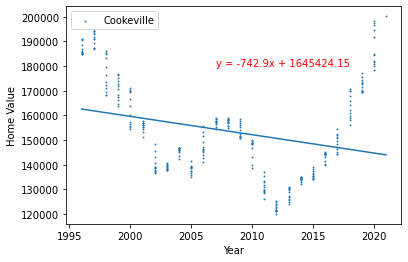

In [131]:
###  Cookeville

X = Cookeville['Year'].values.reshape(-1,1)
y= Cookeville['Home_value'].values.reshape(-1,1)
print("Shape: ", X.shape, y.shape)
plt.scatter(X,y, s=0.75, label="Cookeville")
plt.legend(loc="best")
plt.xlabel("Year")
plt.ylabel("Home Value")
Cookevillemodel=LinearRegression()
Cookevillemodel.fit(X,y)
Cookevillescore=Cookevillemodel.score(X,y)
print(f"Cookeville R2 Score: {Cookevillescore}")

#add the linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(Cookeville['Year'],Cookeville['Home_value'])
regress_values = Cookeville['Year'] * slope + intercept
plt.plot(Cookeville['Year'],regress_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq
plt.annotate(line_eq,(2007,180000),fontsize=10,color="red")

plt.savefig('CookevilleStats.png')

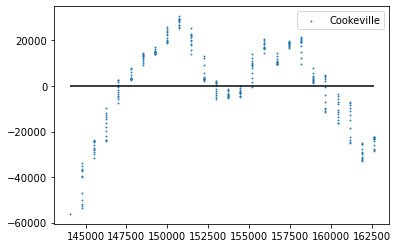

In [82]:
###  Cookeville predictions

predictions = Cookevillemodel.predict(X)

#plot residuals
plt.scatter(predictions, predictions -y, label="Cookeville", s=0.75)
plt.legend(loc="best")
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()
plt.savefig('CookevillePredicts.png')

Shape:  (301, 1) (301, 1)
Williamsburg R2 Score: -3.6288768667310887


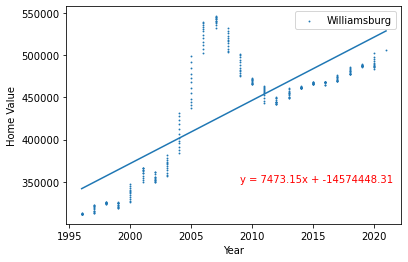

In [132]:
###  Williamsburg

X = Williamsburg['Year'].values.reshape(-1,1)
y= Williamsburg['Home_value'].values.reshape(-1,1)
print("Shape: ", X.shape, y.shape)
plt.scatter(X,y, s=0.75, label="Williamsburg")
plt.legend(loc="best")
plt.xlabel("Year")
plt.ylabel("Home Value")
Williamsburgmodel=LinearRegression()
Williamsburgmodel.fit(X,y)
Williamsburgscore=SantaFemodel.score(X,y)
print(f"Williamsburg R2 Score: {Williamsburgscore}")

#add the linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(Williamsburg['Year'],Williamsburg['Home_value'])
regress_values = Williamsburg['Year'] * slope + intercept
plt.plot(Williamsburg['Year'],regress_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq
plt.annotate(line_eq,(2009,350000),fontsize=10,color="red")

plt.savefig('WilliamsburgStats.png')

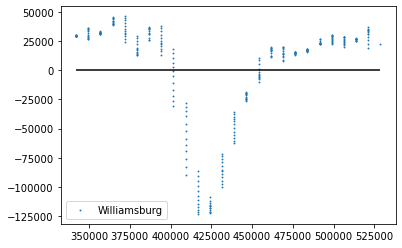

In [86]:
###  Williamsburg predictions

predictions = Williamsburgmodel.predict(X)

#plot residuals
plt.scatter(predictions, predictions -y, s=0.75, label="Williamsburg")
plt.legend(loc="best")
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()
plt.savefig('WilliamsburgPredicts.png')

Shape:  (184, 1) (184, 1)
Waterloo R2 Score: 0.9311989715045836


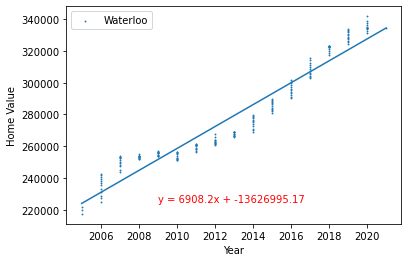

In [133]:
###  Waterloo

X = Waterloo['Year'].values.reshape(-1,1)
y= Waterloo['Home_value'].values.reshape(-1,1)
print("Shape: ", X.shape, y.shape)
plt.scatter(X,y, s=0.75, label="Waterloo")
plt.legend(loc="best")
plt.xlabel("Year")
plt.ylabel("Home Value")
Waterloomodel=LinearRegression()
Waterloomodel.fit(X,y)
Waterlooscore=Waterloomodel.score(X,y)
print(f"Waterloo R2 Score: {Waterlooscore}")

#add the linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(Waterloo['Year'],Waterloo['Home_value'])
regress_values = Waterloo['Year'] * slope + intercept
plt.plot(Waterloo['Year'],regress_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq
plt.annotate(line_eq,(2009,225000),fontsize=10,color="red")

plt.savefig('WaterlooStats.png')

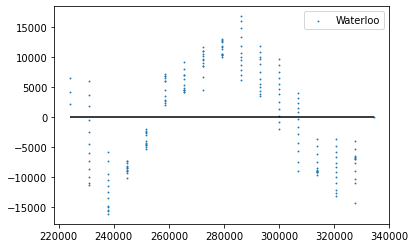

In [115]:
###  Waterloo predictions

predictions = Waterloomodel.predict(X)

#plot residuals
plt.scatter(predictions, predictions -y, s=0.75, label="Waterloo")
plt.legend(loc="best")
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show
plt.savefig('WaterlooPredicts.png')

Shape:  (301, 1) (301, 1)
Portland R2 Score: 0.7981923295659716


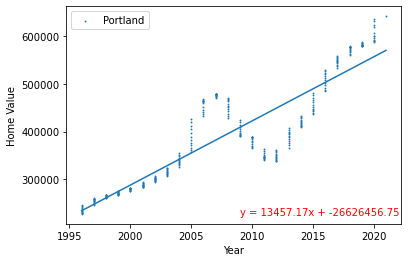

In [135]:
###  Portland

X = Portland['Year'].values.reshape(-1,1)
y= Portland['Home_value'].values.reshape(-1,1)
print("Shape: ", X.shape, y.shape)
plt.scatter(X,y, s=0.75, label="Portland")
plt.legend(loc="best")
plt.xlabel("Year")
plt.ylabel("Home Value")
Portlandmodel=LinearRegression()
Portlandmodel.fit(X,y)
Portlandscore=Portlandmodel.score(X,y)
print(f"Portland R2 Score: {Portlandscore}")

#add the linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(Portland['Year'],Portland['Home_value'])
regress_values = Portland['Year'] * slope + intercept
plt.plot(Portland['Year'],regress_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq
plt.annotate(line_eq,(2009,225000),fontsize=10,color="red")

plt.savefig('PortlandStats.png')

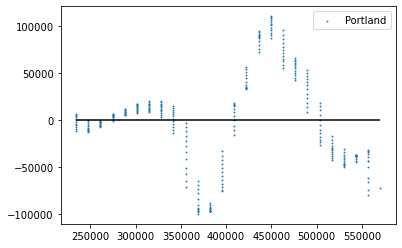

In [111]:
###  Portland predictions

predictions = Portlandmodel.predict(X)

#plot residuals
plt.scatter(predictions, predictions -y, s=0.75, label="Portland")
plt.legend(loc="best")
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()
plt.savefig('PortlandPredicts.png')

Shape:  (301, 1) (301, 1)
StAugustine R2 Score: 0.4496070922667377


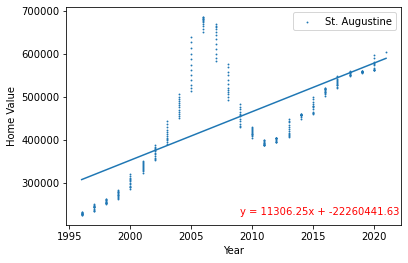

In [136]:
###  StAugustine

X = StAugustine['Year'].values.reshape(-1,1)
y= StAugustine['Home_value'].values.reshape(-1,1)
print("Shape: ", X.shape, y.shape)
plt.scatter(X,y, s=0.75, label= "St. Augustine")
plt.legend(loc="best")
plt.xlabel("Year")
plt.ylabel("Home Value")
StAugustinemodel=LinearRegression()
StAugustinemodel.fit(X,y)
StAugustinescore=StAugustinemodel.score(X,y)
print(f"StAugustine R2 Score: {StAugustinescore}")

#add the linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(StAugustine['Year'],StAugustine['Home_value'])
regress_values = StAugustine['Year'] * slope + intercept
plt.plot(StAugustine['Year'],regress_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq
plt.annotate(line_eq,(2009,225000),fontsize=10,color="red")

plt.savefig('StAugustineStats.png')

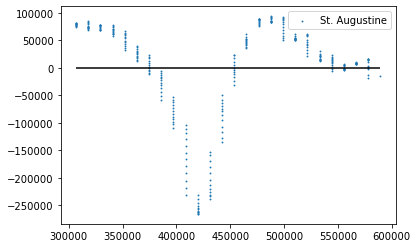

In [118]:
###  StAugustine predictions

predictions = StAugustinemodel.predict(X)

#plot residuals
plt.scatter(predictions, predictions -y, s=0.75, label="St. Augustine")
plt.legend(loc="best")
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()
plt.savefig('StAugustinePredicts.png')

In [76]:
####  STATISTICS RELATED TO CITY SIZE  #########
####  Here, we will try to predict range of home values at different price points(ie budgets).  
####  what we expect to see:  at thtei higher budgets, the predicted range will be larger, as compared to lower budgets.


#BigCities = Housing_data.loc[Housing_data['City_Size']=='Big']
#BigCities
#MediumCities = Housing_data.loc[Housing_data['City_Size']=='Medium']
#MediumCities

In [100]:
### SPLIT DATA INTO TRAINING AND TESTING  ###

X = Housing_data["Year"].values.reshape(-1, 1)
y = Housing_data["Home_value"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


Shape:  (2865, 1) (2865, 1)


In [101]:
ALLmodel = LinearRegression()

In [102]:
ALLmodel.fit(X_train, y_train)

LinearRegression()

In [106]:
predicted = ALLmodel.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)


print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

## again, this shows that using various locations for predictions is NOT good

Mean Squared Error (MSE): 19955632652.14131
R-squared (R2 ): 0.12689204065534165
